<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<h1><center>MACHINE LEARNING : HOMEWORK 3</center></h1>
<h1><center>Data 2 : Authors prediction</center></h1>
<h2>Hector LANDES - M10601810</h2>
<h2>Machine Learning - CS5087701</h2>

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from nltk import word_tokenize, pos_tag, pos_tag_sents
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from sacremoses import MosesTokenizer, MosesDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from collections import Counter
from nltk.corpus import wordnet
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz;
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'

Using TensorFlow backend.


In [362]:
test = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\test.csv')
train = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\train.csv')

Create boolean value if author is EAP, HPL or MWS

In [13]:
a2c = {'EAP': 0, 'HPL' : 1, 'MWS' : 2}
y = np.array([a2c[a] for a in data.author])
y = to_categorical(y)
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

<ul>
<h3>Preprocessing from the HM1</3>
</ul>

In [15]:
eng_stopwords = set(stopwords.words("english"))
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

In [17]:
def Tokenize(text):
    tokens = tokenizer.tokenize(text.lower())
    return tokens

def RemoveStopwords(word_list):
    return [word for word in word_list if word not in stopwords.words('english')]

def GetWordnetPos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def LemmatizeTokens(word_list):
    return [lemmatizer.lemmatize(word, GetWordnetPos(word)) for word in word_list]
   
def CountPartOfSpeech(word_list):
    tagged = nltk.pos_tag(nltk.Text(word_list))
    counts = Counter(tag for word, tag in tagged)
    total = sum(counts.values())
    ret = dict((word, float(count) / total) for word, count in counts.items())
    return ret

def ExtractPartOfSpeech(pos_dict, pos_to_extract):
    if pos_to_extract in pos_dict.keys():


        return pos_dict[pos_to_extract]
   
    return 0

In [20]:
kiki = train.iloc[0:10]

In [21]:
kiki["tokens"] = kiki.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))

#train["tokens"] = train.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))
#test["tokens"] = test.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
kiki["pos"] = kiki.tokens.apply(CountPartOfSpeech)

#train["pos"] = train.tokens.apply(CountPartOfSpeech)
#test["pos"] = test.tokens.apply(CountPartOfSpeech)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
kiki["prop_noun"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
kiki["prop_verb"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
kiki["prop_adj"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
kiki["prop_adv"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))

#train["prop_noun"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
#train["prop_verb"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
#train["prop_adj"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
#train["prop_adv"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))
#test["prop_noun"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
#test["prop_verb"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
#test["prop_adj"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
#test["prop_adv"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [24]:
kiki["num_words"] = kiki["text"].apply(lambda x: len(str(x).split()))

#train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
#test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
kiki["token_num_words"] = kiki["tokens"].apply(lambda x: len(str(x).split()))
#test["token_num_words"] = test["tokens"].apply(lambda x: len(str(x).split()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
kiki["num_unique_words"] = kiki["text"].apply(lambda x: len(set(str(x).split())))
#test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
kiki["num_chars"] = kiki["text"].apply(lambda x: len(str(x)))
#test["num_chars"] = test["text"].apply(lambda x: len(str(x)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
kiki["num_punctuations"] = kiki['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#test["num_punctuations"] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
kiki["num_words_upper"] = kiki["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
kiki["num_words_title"] = kiki["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
kiki["mean_word_len"] = kiki["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test["mean_word_len"] = test["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
kiki["mean_word_len"] = kiki["tokens"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test["mean_word_len"] = test["tokens"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
kiki["std_word_len"] = kiki["text"].apply(lambda x: np.std([len(w) for w in str(x).split()]))
#test["std_word_len"] = test["text"].apply(lambda x: np.std([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
kiki["std_word_len"] = kiki["tokens"].apply(lambda x: np.std([len(w) for w in str(x).split()]))
#test["std_word_len"] = test["tokens"].apply(lambda x: np.std([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
kiki['label_author'] = LabelEncoder().fit_transform(kiki['author'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
cols = kiki.columns.tolist()
cols

['id',
 'text',
 'author',
 'num_stopwords',
 'tokens',
 'pos',
 'prop_noun',
 'prop_verb',
 'prop_adj',
 'prop_adv',
 'num_words',
 'token_num_words',
 'num_unique_words',
 'num_chars',
 'num_punctuations',
 'num_words_upper',
 'num_words_title',
 'mean_word_len',
 'std_word_len',
 'label_author']

In [37]:
kiki = kiki[['id',
 'text',
 'author',
 'tokens',
 'pos',
'num_stopwords',             
 'prop_noun',
 'prop_verb',
 'prop_adj',
 'prop_adv',
 'num_words',
 'token_num_words',
 'num_unique_words',
 'num_chars',
 'num_punctuations',
 'num_words_upper',
 'num_words_title',
 'mean_word_len',
 'std_word_len',
 'label_author']]
#test = test[['id',
# 'text',
# 'tokens',
# 'pos',
#'num_stopwords',             
# 'prop_noun',
# 'prop_verb',
# 'prop_adj',
# 'prop_adv',
# 'num_words',
# 'token_num_words',
# 'num_unique_words',
# 'num_chars',
# 'num_punctuations',
# 'num_words_upper',
# 'num_words_title',
# 'mean_word_len',
# 'std_word_len']]

<ul>
<b> X </b> as the <b> Feature Matrix and normalization </b> 
</ul>

In [38]:
X = kiki[kiki.columns[5:19]]
X = (X - X.min()) / (X.max() - X.min())
X[0:2]

,num_stopwords,prop_noun,prop_verb,prop_adj,prop_adv,num_words,token_num_words,num_unique_words,num_chars,num_punctuations,num_words_upper,num_words_title,mean_word_len,std_word_len
0,0.365854,0.52381,0.142857,0.571429,0.500,0.4125,0.447368,0.465517,0.422472,0.6,0.4,0.333333,0.254042,0.38581
1,0.097561,0.00000,1.000000,0.666667,0.875,0.0750,0.052632,0.103448,0.062921,0.0,0.0,0.000000,0.012702,0.00000


<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [39]:
Y = kiki['label_author']
Y[0:5]

0    0
1    1
2    0
3    2
4    1
Name: label_author, dtype: int32

Now we will split the data in training and testing data

In [40]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [41]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (8, 14)    Testing: (2, 14)
Target value   ->   Training: (8,)       Testing: (2,)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

https://www.kaggle.com/nzw0301/simple-keras-fasttext-val-loss-0-31

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, GlobalAveragePooling1D, Embedding
from keras.callbacks import EarlyStopping

In [356]:
def preprocess(text):
    text = text.replace("' ", " ' ")
    signs = set(',.:;"?!')
    prods = set(text) & signs
    if not prods:
        return text

    for sign in prods:
        text = text.replace(sign, ' {} '.format(sign) )
    return text

In [357]:
def create_docs(df, n_gram_max=2):
    def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
        
    docs = []
    for doc in df.text:
        doc = preprocess(doc).split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    
    return docs

In [358]:
min_count = 2

docs = create_docs(data)
tokenizer = Tokenizer(lower=False, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=False, filters='')
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)

maxlen = 256

docs = pad_sequences(sequences=docs, maxlen=maxlen)

In [359]:
input_dim = np.max(docs) + 3
embedding_dims = 25

In [360]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [361]:
epochs = 100
x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.2)

model = create_model()
hist = model.fit(x_train, y_train,
                 batch_size=1600,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

ValueError: Found input variables with inconsistent numbers of samples: [19579, 6]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<ul>
<h3>Fit Keras Model<h/3>
</ul>

In [354]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(docs, y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [19579, 6]

In [ ]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [195]:
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=20))
model.add(GlobalAveragePooling1D())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [211]:
hist = model.fit(x_train, y_train, batch_size=1000, validation_data=(x_test, y_test), epochs=200,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - ETA: 0s - loss: 1.0543 - accuracy: 0.41 - ETA: 0s - loss: 1.0495 - accuracy: 0.42 - ETA: 0s - loss: 1.0472 - accuracy: 0.43 - ETA: 0s - loss: 1.0470 - accuracy: 0.43 - ETA: 0s - loss: 1.0477 - accuracy: 0.43 - ETA: 0s - loss: 1.0493 - accuracy: 0.42 - ETA: 0s - loss: 1.0493 - accuracy: 0.42 - ETA: 0s - loss: 1.0492 - accuracy: 0.42 - 1s 47us/step - loss: 1.0490 - accuracy: 0.4290 - val_loss: 1.0548 - val_accuracy: 0.4221
Epoch 2/200
15663/15663 [==============================] - ETA: 0s - loss: 1.0494 - accuracy: 0.42 - ETA: 0s - loss: 1.0443 - accuracy: 0.44 - ETA: 0s - loss: 1.0437 - accuracy: 0.44 - ETA: 0s - loss: 1.0444 - accuracy: 0.44 - ETA: 0s - loss: 1.0439 - accuracy: 0.44 - ETA: 0s - loss: 1.0445 - accuracy: 0.44 - ETA: 0s - loss: 1.0452 - accuracy: 0.44 - ETA: 0s - loss: 1.0451 - accuracy: 0.44 - 1s 48us/step - loss: 1.0448 - accuracy: 0.4449 - val_loss: 1.0510 - val_

15663/15663 [==============================] - ETA: 0s - loss: 0.9287 - accuracy: 0.59 - ETA: 0s - loss: 0.9250 - accuracy: 0.60 - ETA: 0s - loss: 0.9204 - accuracy: 0.61 - ETA: 0s - loss: 0.9234 - accuracy: 0.61 - ETA: 0s - loss: 0.9231 - accuracy: 0.61 - ETA: 0s - loss: 0.9228 - accuracy: 0.61 - ETA: 0s - loss: 0.9206 - accuracy: 0.61 - ETA: 0s - loss: 0.9193 - accuracy: 0.61 - 1s 48us/step - loss: 0.9188 - accuracy: 0.6204 - val_loss: 0.9443 - val_accuracy: 0.5855
Epoch 18/200
15663/15663 [==============================] - ETA: 0s - loss: 0.9211 - accuracy: 0.60 - ETA: 0s - loss: 0.9108 - accuracy: 0.62 - ETA: 0s - loss: 0.9141 - accuracy: 0.61 - ETA: 0s - loss: 0.9116 - accuracy: 0.61 - ETA: 0s - loss: 0.9085 - accuracy: 0.62 - ETA: 0s - loss: 0.9095 - accuracy: 0.62 - ETA: 0s - loss: 0.9100 - accuracy: 0.62 - ETA: 0s - loss: 0.9071 - accuracy: 0.62 - 1s 48us/step - loss: 0.9074 - accuracy: 0.6253 - val_loss: 0.9353 - val_accuracy: 0.5896
Epoch 19/200
15663/15663 [=================

15663/15663 [==============================] - ETA: 0s - loss: 0.7578 - accuracy: 0.67 - ETA: 0s - loss: 0.7661 - accuracy: 0.66 - ETA: 0s - loss: 0.7557 - accuracy: 0.67 - ETA: 0s - loss: 0.7599 - accuracy: 0.67 - ETA: 0s - loss: 0.7611 - accuracy: 0.67 - ETA: 0s - loss: 0.7566 - accuracy: 0.67 - ETA: 0s - loss: 0.7576 - accuracy: 0.67 - ETA: 0s - loss: 0.7574 - accuracy: 0.67 - ETA: 0s - loss: 0.7574 - accuracy: 0.67 - 1s 50us/step - loss: 0.7564 - accuracy: 0.6738 - val_loss: 0.8261 - val_accuracy: 0.6251
Epoch 34/200
15663/15663 [==============================] - ETA: 0s - loss: 0.7346 - accuracy: 0.69 - ETA: 0s - loss: 0.7497 - accuracy: 0.67 - ETA: 0s - loss: 0.7465 - accuracy: 0.67 - ETA: 0s - loss: 0.7460 - accuracy: 0.67 - ETA: 0s - loss: 0.7497 - accuracy: 0.67 - ETA: 0s - loss: 0.7506 - accuracy: 0.67 - ETA: 0s - loss: 0.7492 - accuracy: 0.67 - ETA: 0s - loss: 0.7487 - accuracy: 0.67 - 1s 48us/step - loss: 0.7484 - accuracy: 0.6751 - val_loss: 0.8214 - val_accuracy: 0.6246
E

15663/15663 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.68 - ETA: 0s - loss: 0.6590 - accuracy: 0.69 - ETA: 0s - loss: 0.6593 - accuracy: 0.69 - ETA: 0s - loss: 0.6585 - accuracy: 0.69 - ETA: 0s - loss: 0.6562 - accuracy: 0.69 - ETA: 0s - loss: 0.6548 - accuracy: 0.69 - ETA: 0s - loss: 0.6536 - accuracy: 0.69 - ETA: 0s - loss: 0.6534 - accuracy: 0.69 - ETA: 0s - loss: 0.6544 - accuracy: 0.69 - 1s 48us/step - loss: 0.6548 - accuracy: 0.6923 - val_loss: 0.7630 - val_accuracy: 0.6338
Epoch 50/200
15663/15663 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.70 - ETA: 0s - loss: 0.6465 - accuracy: 0.69 - ETA: 0s - loss: 0.6439 - accuracy: 0.69 - ETA: 0s - loss: 0.6497 - accuracy: 0.69 - ETA: 0s - loss: 0.6495 - accuracy: 0.69 - ETA: 0s - loss: 0.6494 - accuracy: 0.69 - ETA: 0s - loss: 0.6465 - accuracy: 0.70 - ETA: 0s - loss: 0.6494 - accuracy: 0.69 - ETA: 0s - loss: 0.6512 - accuracy: 0.69 - ETA: 0s - loss: 0.6533 - accuracy: 0.69 - ETA: 0

Epoch 64/200
15663/15663 [==============================] - ETA: 0s - loss: 0.6123 - accuracy: 0.68 - ETA: 0s - loss: 0.6132 - accuracy: 0.68 - ETA: 0s - loss: 0.6106 - accuracy: 0.69 - ETA: 0s - loss: 0.6072 - accuracy: 0.69 - ETA: 0s - loss: 0.6055 - accuracy: 0.69 - ETA: 0s - loss: 0.6035 - accuracy: 0.69 - ETA: 0s - loss: 0.5998 - accuracy: 0.70 - ETA: 0s - loss: 0.5981 - accuracy: 0.70 - ETA: 0s - loss: 0.5985 - accuracy: 0.69 - ETA: 0s - loss: 0.5981 - accuracy: 0.69 - 1s 50us/step - loss: 0.5972 - accuracy: 0.7007 - val_loss: 0.7310 - val_accuracy: 0.6361
Epoch 65/200
15663/15663 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.70 - ETA: 0s - loss: 0.5966 - accuracy: 0.70 - ETA: 0s - loss: 0.5911 - accuracy: 0.70 - ETA: 0s - loss: 0.5918 - accuracy: 0.70 - ETA: 0s - loss: 0.5925 - accuracy: 0.70 - ETA: 0s - loss: 0.5942 - accuracy: 0.70 - ETA: 0s - loss: 0.5948 - accuracy: 0.70 - ETA: 0s - loss: 0.5937 - accuracy: 0.70 - 1s 46us/step - loss: 0.5940 - accur

Epoch 80/200
15663/15663 [==============================] - ETA: 0s - loss: 0.5677 - accuracy: 0.70 - ETA: 0s - loss: 0.5576 - accuracy: 0.71 - ETA: 0s - loss: 0.5584 - accuracy: 0.71 - ETA: 0s - loss: 0.5576 - accuracy: 0.71 - ETA: 0s - loss: 0.5554 - accuracy: 0.71 - ETA: 0s - loss: 0.5558 - accuracy: 0.71 - ETA: 0s - loss: 0.5560 - accuracy: 0.71 - ETA: 0s - loss: 0.5572 - accuracy: 0.71 - ETA: 0s - loss: 0.5564 - accuracy: 0.70 - ETA: 0s - loss: 0.5575 - accuracy: 0.70 - ETA: 0s - loss: 0.5577 - accuracy: 0.70 - ETA: 0s - loss: 0.5576 - accuracy: 0.70 - 1s 56us/step - loss: 0.5577 - accuracy: 0.7054 - val_loss: 0.7141 - val_accuracy: 0.6364
Epoch 81/200
15663/15663 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.71 - ETA: 0s - loss: 0.5521 - accuracy: 0.71 - ETA: 0s - loss: 0.5566 - accuracy: 0.70 - ETA: 0s - loss: 0.5573 - accuracy: 0.70 - ETA: 0s - loss: 0.5575 - accuracy: 0.70 - ETA: 0s - loss: 0.5580 - accuracy: 0.70 - ETA: 0s - loss: 0.5567 - accuracy: 

In [212]:
model1 = Sequential()
model1.add(Embedding(input_dim=input_dim, output_dim=20))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(4, activation='softmax'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [252]:
hist1 = model1.fit(x_train, y_train, batch_size=100, validation_data=(x_test, y_test), epochs=1000,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

Train on 15663 samples, validate on 3916 samples
Epoch 1/1000
15663/15663 [==============================] - ETA: 3s - loss: 0.0362 - accuracy: 0.99 - ETA: 3s - loss: 0.0324 - accuracy: 0.99 - ETA: 3s - loss: 0.0341 - accuracy: 0.99 - ETA: 3s - loss: 0.0332 - accuracy: 0.99 - ETA: 3s - loss: 0.0310 - accuracy: 0.99 - ETA: 3s - loss: 0.0309 - accuracy: 0.99 - ETA: 3s - loss: 0.0304 - accuracy: 0.99 - ETA: 3s - loss: 0.0313 - accuracy: 0.99 - ETA: 3s - loss: 0.0351 - accuracy: 0.99 - ETA: 3s - loss: 0.0365 - accuracy: 0.99 - ETA: 3s - loss: 0.0362 - accuracy: 0.99 - ETA: 3s - loss: 0.0355 - accuracy: 0.99 - ETA: 3s - loss: 0.0353 - accuracy: 0.99 - ETA: 3s - loss: 0.0347 - accuracy: 0.99 - ETA: 3s - loss: 0.0347 - accuracy: 0.99 - ETA: 3s - loss: 0.0341 - accuracy: 0.99 - ETA: 3s - loss: 0.0342 - accuracy: 0.99 - ETA: 2s - loss: 0.0342 - accuracy: 0.99 - ETA: 2s - loss: 0.0338 - accuracy: 0.99 - ETA: 2s - loss: 0.0342 - accuracy: 0.99 - ETA: 2s - loss: 0.0336 - accuracy: 0.99 - ETA: 2s -

15663/15663 [==============================] - ETA: 3s - loss: 0.0177 - accuracy: 1.00 - ETA: 3s - loss: 0.0209 - accuracy: 1.00 - ETA: 3s - loss: 0.0271 - accuracy: 0.99 - ETA: 3s - loss: 0.0309 - accuracy: 0.99 - ETA: 3s - loss: 0.0282 - accuracy: 0.99 - ETA: 3s - loss: 0.0265 - accuracy: 0.99 - ETA: 3s - loss: 0.0260 - accuracy: 0.99 - ETA: 3s - loss: 0.0252 - accuracy: 0.99 - ETA: 3s - loss: 0.0262 - accuracy: 0.99 - ETA: 3s - loss: 0.0264 - accuracy: 0.99 - ETA: 3s - loss: 0.0264 - accuracy: 0.99 - ETA: 3s - loss: 0.0280 - accuracy: 0.99 - ETA: 3s - loss: 0.0293 - accuracy: 0.99 - ETA: 3s - loss: 0.0294 - accuracy: 0.99 - ETA: 3s - loss: 0.0291 - accuracy: 0.99 - ETA: 3s - loss: 0.0283 - accuracy: 0.99 - ETA: 3s - loss: 0.0281 - accuracy: 0.99 - ETA: 3s - loss: 0.0279 - accuracy: 0.99 - ETA: 3s - loss: 0.0281 - accuracy: 0.99 - ETA: 3s - loss: 0.0280 - accuracy: 0.99 - ETA: 3s - loss: 0.0285 - accuracy: 0.99 - ETA: 3s - loss: 0.0289 - accuracy: 0.99 - ETA: 3s - loss: 0.0305 - accu

In [214]:
model2 = Sequential()
model2.add(Embedding(input_dim=input_dim, output_dim=20))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(5, activation='softmax'))
model2.add(Dense(4, activation='softmax'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [215]:
hist2 = model2.fit(x_train, y_train, batch_size=1000, validation_data=(x_test, y_test), epochs=200,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - ETA: 1s - loss: 1.0949 - accuracy: 0.38 - ETA: 0s - loss: 1.0899 - accuracy: 0.40 - ETA: 0s - loss: 1.0889 - accuracy: 0.40 - ETA: 0s - loss: 1.0888 - accuracy: 0.40 - ETA: 0s - loss: 1.0893 - accuracy: 0.40 - ETA: 0s - loss: 1.0881 - accuracy: 0.40 - ETA: 0s - loss: 1.0875 - accuracy: 0.40 - ETA: 0s - loss: 1.0875 - accuracy: 0.40 - 1s 51us/step - loss: 1.0880 - accuracy: 0.4051 - val_loss: 1.0900 - val_accuracy: 0.3971
Epoch 2/200
15663/15663 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.39 - ETA: 0s - loss: 1.0898 - accuracy: 0.39 - ETA: 0s - loss: 1.0873 - accuracy: 0.40 - ETA: 0s - loss: 1.0870 - accuracy: 0.40 - ETA: 0s - loss: 1.0868 - accuracy: 0.40 - ETA: 0s - loss: 1.0866 - accuracy: 0.40 - ETA: 0s - loss: 1.0873 - accuracy: 0.40 - ETA: 0s - loss: 1.0871 - accuracy: 0.40 - 1s 46us/step - loss: 1.0873 - accuracy: 0.4051 - val_loss: 1.0894 - val_

15663/15663 [==============================] - ETA: 0s - loss: 1.0815 - accuracy: 0.41 - ETA: 0s - loss: 1.0804 - accuracy: 0.41 - ETA: 0s - loss: 1.0831 - accuracy: 0.41 - ETA: 0s - loss: 1.0836 - accuracy: 0.40 - ETA: 0s - loss: 1.0841 - accuracy: 0.40 - ETA: 0s - loss: 1.0837 - accuracy: 0.40 - ETA: 0s - loss: 1.0841 - accuracy: 0.40 - ETA: 0s - loss: 1.0838 - accuracy: 0.40 - 1s 46us/step - loss: 1.0842 - accuracy: 0.4051 - val_loss: 1.0861 - val_accuracy: 0.3971
Epoch 18/200
15663/15663 [==============================] - ETA: 0s - loss: 1.0878 - accuracy: 0.39 - ETA: 0s - loss: 1.0839 - accuracy: 0.40 - ETA: 0s - loss: 1.0834 - accuracy: 0.40 - ETA: 0s - loss: 1.0842 - accuracy: 0.40 - ETA: 0s - loss: 1.0837 - accuracy: 0.40 - ETA: 0s - loss: 1.0841 - accuracy: 0.40 - ETA: 0s - loss: 1.0839 - accuracy: 0.40 - ETA: 0s - loss: 1.0834 - accuracy: 0.40 - 1s 46us/step - loss: 1.0833 - accuracy: 0.4051 - val_loss: 1.0851 - val_accuracy: 0.3971
Epoch 19/200
15663/15663 [=================

15663/15663 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.61 - ETA: 0s - loss: 0.9555 - accuracy: 0.60 - ETA: 0s - loss: 0.9552 - accuracy: 0.60 - ETA: 0s - loss: 0.9552 - accuracy: 0.60 - ETA: 0s - loss: 0.9547 - accuracy: 0.60 - ETA: 0s - loss: 0.9539 - accuracy: 0.59 - ETA: 0s - loss: 0.9538 - accuracy: 0.59 - ETA: 0s - loss: 0.9521 - accuracy: 0.59 - 1s 48us/step - loss: 0.9521 - accuracy: 0.5978 - val_loss: 0.9667 - val_accuracy: 0.5728
Epoch 34/200
15663/15663 [==============================] - ETA: 0s - loss: 0.9512 - accuracy: 0.58 - ETA: 0s - loss: 0.9496 - accuracy: 0.59 - ETA: 0s - loss: 0.9450 - accuracy: 0.60 - ETA: 0s - loss: 0.9439 - accuracy: 0.60 - ETA: 0s - loss: 0.9435 - accuracy: 0.60 - ETA: 0s - loss: 0.9419 - accuracy: 0.60 - ETA: 0s - loss: 0.9404 - accuracy: 0.60 - ETA: 0s - loss: 0.9410 - accuracy: 0.60 - ETA: 0s - loss: 0.9388 - accuracy: 0.60 - ETA: 0s - loss: 0.9380 - accuracy: 0.60 - ETA: 0s - loss: 0.9374 - accuracy: 0.60 - ETA: 0

15663/15663 [==============================] - ETA: 0s - loss: 0.7397 - accuracy: 0.66 - ETA: 0s - loss: 0.7423 - accuracy: 0.65 - ETA: 0s - loss: 0.7450 - accuracy: 0.65 - ETA: 0s - loss: 0.7433 - accuracy: 0.65 - ETA: 0s - loss: 0.7448 - accuracy: 0.65 - ETA: 0s - loss: 0.7425 - accuracy: 0.65 - ETA: 0s - loss: 0.7414 - accuracy: 0.65 - ETA: 0s - loss: 0.7396 - accuracy: 0.65 - ETA: 0s - loss: 0.7394 - accuracy: 0.66 - ETA: 0s - loss: 0.7381 - accuracy: 0.66 - ETA: 0s - loss: 0.7372 - accuracy: 0.66 - ETA: 0s - loss: 0.7378 - accuracy: 0.66 - ETA: 0s - loss: 0.7382 - accuracy: 0.66 - ETA: 0s - loss: 0.7382 - accuracy: 0.66 - 1s 57us/step - loss: 0.7386 - accuracy: 0.6623 - val_loss: 0.8083 - val_accuracy: 0.6126
Epoch 49/200
15663/15663 [==============================] - ETA: 0s - loss: 0.7307 - accuracy: 0.67 - ETA: 0s - loss: 0.7285 - accuracy: 0.67 - ETA: 0s - loss: 0.7304 - accuracy: 0.67 - ETA: 0s - loss: 0.7300 - accuracy: 0.67 - ETA: 0s - loss: 0.7321 - accuracy: 0.66 - ETA: 0

Epoch 63/200
15663/15663 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.66 - ETA: 0s - loss: 0.6245 - accuracy: 0.67 - ETA: 0s - loss: 0.6232 - accuracy: 0.67 - ETA: 0s - loss: 0.6248 - accuracy: 0.67 - ETA: 0s - loss: 0.6230 - accuracy: 0.68 - ETA: 0s - loss: 0.6240 - accuracy: 0.68 - ETA: 0s - loss: 0.6227 - accuracy: 0.68 - ETA: 0s - loss: 0.6231 - accuracy: 0.68 - 1s 49us/step - loss: 0.6226 - accuracy: 0.6817 - val_loss: 0.7335 - val_accuracy: 0.6226
Epoch 64/200
15663/15663 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.68 - ETA: 0s - loss: 0.6214 - accuracy: 0.68 - ETA: 0s - loss: 0.6211 - accuracy: 0.68 - ETA: 0s - loss: 0.6197 - accuracy: 0.67 - ETA: 0s - loss: 0.6192 - accuracy: 0.67 - ETA: 0s - loss: 0.6185 - accuracy: 0.68 - ETA: 0s - loss: 0.6186 - accuracy: 0.68 - ETA: 0s - loss: 0.6186 - accuracy: 0.68 - 1s 47us/step - loss: 0.6175 - accuracy: 0.6822 - val_loss: 0.7318 - val_accuracy: 0.6223
Epoch 65/200
15663/15663 [====

15663/15663 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.67 - ETA: 0s - loss: 0.5728 - accuracy: 0.67 - ETA: 0s - loss: 0.5659 - accuracy: 0.68 - ETA: 0s - loss: 0.5693 - accuracy: 0.67 - ETA: 0s - loss: 0.5670 - accuracy: 0.68 - ETA: 0s - loss: 0.5666 - accuracy: 0.68 - ETA: 0s - loss: 0.5653 - accuracy: 0.68 - ETA: 0s - loss: 0.5645 - accuracy: 0.68 - 1s 49us/step - loss: 0.5645 - accuracy: 0.6886 - val_loss: 0.7011 - val_accuracy: 0.6251
Epoch 80/200
15663/15663 [==============================] - ETA: 0s - loss: 0.5654 - accuracy: 0.68 - ETA: 0s - loss: 0.5616 - accuracy: 0.69 - ETA: 0s - loss: 0.5666 - accuracy: 0.68 - ETA: 0s - loss: 0.5632 - accuracy: 0.68 - ETA: 0s - loss: 0.5612 - accuracy: 0.68 - ETA: 0s - loss: 0.5634 - accuracy: 0.68 - ETA: 0s - loss: 0.5612 - accuracy: 0.68 - ETA: 0s - loss: 0.5616 - accuracy: 0.68 - 1s 47us/step - loss: 0.5620 - accuracy: 0.6889 - val_loss: 0.6995 - val_accuracy: 0.6256
Epoch 81/200
15663/15663 [=================

In [216]:
model3 = Sequential()
model3.add(Embedding(input_dim=input_dim, output_dim=20))
model3.add(GlobalAveragePooling1D())
model3.add(Dense(4, activation='softmax'))
model3.add(Dense(5, activation='softmax'))
model3.add(Dense(4, activation='softmax'))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [217]:
hist3 = model3.fit(x_train, y_train, batch_size=1000, validation_data=(x_test, y_test), epochs=200,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - ETA: 2s - loss: 1.1155 - accuracy: 0.29 - ETA: 0s - loss: 1.1134 - accuracy: 0.30 - ETA: 0s - loss: 1.1130 - accuracy: 0.29 - ETA: 0s - loss: 1.1124 - accuracy: 0.28 - ETA: 0s - loss: 1.1118 - accuracy: 0.28 - ETA: 0s - loss: 1.1110 - accuracy: 0.28 - ETA: 0s - loss: 1.1106 - accuracy: 0.28 - ETA: 0s - loss: 1.1098 - accuracy: 0.28 - 1s 55us/step - loss: 1.1097 - accuracy: 0.2883 - val_loss: 1.1049 - val_accuracy: 0.2858
Epoch 2/200
15663/15663 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.30 - ETA: 0s - loss: 1.1053 - accuracy: 0.28 - ETA: 0s - loss: 1.1045 - accuracy: 0.28 - ETA: 0s - loss: 1.1041 - accuracy: 0.29 - ETA: 0s - loss: 1.1037 - accuracy: 0.29 - ETA: 0s - loss: 1.1033 - accuracy: 0.28 - ETA: 0s - loss: 1.1029 - accuracy: 0.28 - ETA: 0s - loss: 1.1025 - accuracy: 0.28 - 1s 49us/step - loss: 1.1024 - accuracy: 0.2892 - val_loss: 1.0990 - val_

In [218]:
model4 = Sequential()
model4.add(Embedding(input_dim=input_dim, output_dim=20))
model4.add(GlobalAveragePooling1D())
model4.add(Dense(3, activation='softmax'))
model4.add(Dense(4, activation='softmax'))
model4.add(Dense(5, activation='softmax'))
model4.add(Dense(4, activation='softmax'))
model4.add(Dense(3, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
hist4 = model4.fit(x_train, y_train, batch_size=1000, validation_data=(x_test, y_test), epochs=200,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - ETA: 2s - loss: 1.1280 - accuracy: 0.29 - ETA: 1s - loss: 1.1253 - accuracy: 0.30 - ETA: 0s - loss: 1.1245 - accuracy: 0.30 - ETA: 0s - loss: 1.1219 - accuracy: 0.30 - ETA: 0s - loss: 1.1215 - accuracy: 0.30 - ETA: 0s - loss: 1.1216 - accuracy: 0.30 - ETA: 0s - loss: 1.1217 - accuracy: 0.30 - ETA: 0s - loss: 1.1212 - accuracy: 0.30 - ETA: 0s - loss: 1.1209 - accuracy: 0.30 - 1s 58us/step - loss: 1.1204 - accuracy: 0.3066 - val_loss: 1.1122 - val_accuracy: 0.3172
Epoch 2/200
15663/15663 [==============================] - ETA: 0s - loss: 1.1189 - accuracy: 0.29 - ETA: 0s - loss: 1.1151 - accuracy: 0.30 - ETA: 0s - loss: 1.1149 - accuracy: 0.30 - ETA: 0s - loss: 1.1144 - accuracy: 0.30 - ETA: 0s - loss: 1.1147 - accuracy: 0.30 - ETA: 0s - loss: 1.1126 - accuracy: 0.30 - ETA: 0s - loss: 1.1128 - accuracy: 0.30 - ETA: 0s - loss: 1.1127 - accuracy: 0.30 - ETA: 0s - loss: 1.1122 - accur

In [237]:
model5 = Sequential()
model5.add(Embedding(input_dim=input_dim, output_dim=20))
model5.add(GlobalAveragePooling1D())
model5.add(Dense(2, activation='softmax'))
model5.add(Dense(3, activation='softmax'))
model5.add(Dense(4, activation='softmax'))
model5.add(Dense(5, activation='softmax'))
model5.add(Dense(4, activation='softmax'))
model5.add(Dense(3, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [238]:
hist5 = model5.fit(x_train, y_train, batch_size=1000, validation_data=(x_test, y_test), epochs=200,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15663 samples, validate on 3916 samples
Epoch 1/200
15663/15663 [==============================] - ETA: 2s - loss: 1.0895 - accuracy: 0.41 - ETA: 1s - loss: 1.0898 - accuracy: 0.40 - ETA: 0s - loss: 1.0877 - accuracy: 0.41 - ETA: 0s - loss: 1.0886 - accuracy: 0.40 - ETA: 0s - loss: 1.0892 - accuracy: 0.40 - ETA: 0s - loss: 1.0884 - accuracy: 0.40 - ETA: 0s - loss: 1.0890 - accuracy: 0.40 - ETA: 0s - loss: 1.0887 - accuracy: 0.40 - 1s 56us/step - loss: 1.0887 - accuracy: 0.4051 - val_loss: 1.0891 - val_accuracy: 0.3971
Epoch 2/200
15663/15663 [==============================] - ETA: 0s - loss: 1.0915 - accuracy: 0.39 - ETA: 0s - loss: 1.0925 - accuracy: 0.38 - ETA: 0s - loss: 1.0908 - accuracy: 0.39 - ETA: 0s - loss: 1.0904 - accuracy: 0.39 - ETA: 0s - loss: 1.0887 - accuracy: 0.40 - ETA: 0s - loss: 1.0886 - accuracy: 0.40 - ETA: 0s - loss: 1.0880 - accuracy: 0.40 - ETA: 0s - loss: 1.0872 - accuracy: 0.40 - 1s 47us/step - loss: 1.0873 - accuracy: 0.4051 - val_loss: 1.0890 - val_

In [240]:
accuracy = model.evaluate(X_testset, Y_testset)
accuracy1 = model1.evaluate(X_testset, Y_testset)
accuracy2 = model2.evaluate(X_testset, Y_testset)
accuracy3 = model3.evaluate(X_testset, Y_testset)
accuracy4 = model4.evaluate(X_testset, Y_testset)
accuracy5 = model5.evaluate(X_testset, Y_testset)

3916/3916 [==============================] - ETA:  - ETA:  - 0s 19us/step


In [242]:
print('Accuracy for 0 hidden layer: %.2f' % (accuracy[1]*100),'%')
print('Loss for 0 hidden layer: %.2f' % (accuracy[0]*100),'%')
print('Accuracy for 1 hidden layer: %.2f' % (accuracy1[1]*100),'%')
print('Loss for 1 hidden layer: %.2f' % (accuracy1[0]*100),'%')
print('Accuracy for 2 hidden layers: %.2f' % (accuracy2[1]*100),'%')
print('Loss for 2 hidden layers: %.2f' % (accuracy2[0]*100),'%')
print('Accuracy for 3 hidden layers: %.2f' % (accuracy3[1]*100),'%')
print('Loss for 3 hidden layers: %.2f' % (accuracy3[0]*100),'%')
print('Accuracy for 4 hidden layers: %.2f' % (accuracy4[1]*100),'%')
print('Loss for 4 hidden layers: %.2f' % (accuracy4[0]*100),'%')
print('Accuracy for 5 hidden layers: %.2f' % (accuracy5[1]*100),'%')
print('Loss for 5 hidden layers: %.2f' % (accuracy5[0]*100),'%')

Accuracy for 0 hidden layer: 68.44 %
Loss for 0 hidden layer: 57.42 %
Accuracy for 1 hidden layer: 96.68 %
Loss for 1 hidden layer: 14.65 %
Accuracy for 2 hidden layers: 68.34 %
Loss for 2 hidden layers: 56.57 %
Accuracy for 3 hidden layers: 39.79 %
Loss for 3 hidden layers: 108.96 %
Accuracy for 4 hidden layers: 39.79 %
Loss for 4 hidden layers: 108.98 %
Accuracy for 5 hidden layers: 39.79 %
Loss for 5 hidden layers: 108.98 %


In [243]:
Accuracies ={0:accuracy[1]*100, 1:accuracy1[1]*100, 2:accuracy2[1]*100, 3:accuracy3[1]*100, 4:accuracy4[1]*100,
            5:accuracy5[1]*100}

In [244]:
import matplotlib.pylab as plt

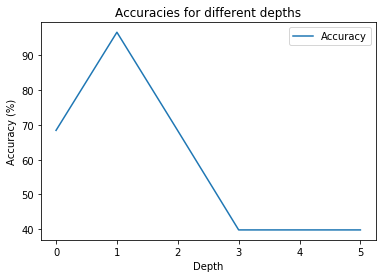

In [246]:
lists = sorted(Accuracies.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Accuracies for different depths')
plt.ylabel('Accuracy (%)')
plt.xlabel('Depth')
plt.legend(['Accuracy'], loc='best')
plt.show()

In [ ]:
from keras.layers import Dense, Flatten, Activation, Dropout

In [ ]:
model_drop = Sequential()
model_drop.add(Dense(12, input_dim=256, activation='sigmoid'))
model_drop.add(Dropout(0.2))
model_drop.add(Activation('sigmoid'))
model_drop.add(Dense(8))
model_drop.add(Dropout(0.2))
model_drop.add(Activation('sigmoid'))
model_drop.add(Dense(3, activation='softmax'))

In [253]:
model_drop = Sequential()
model_drop.add(Embedding(input_dim=input_dim, output_dim=20))
model_drop.add(GlobalAveragePooling1D())
model_drop.add(Dropout(0.2))
model_drop.add(Dense(4, activation='softmax'))
model_drop.add(Dropout(0.2))
model_drop.add(Dense(3, activation='softmax'))
model_drop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [256]:
history_dropout = model_drop.fit(x_train, y_train, batch_size=10000, validation_data=(x_test, y_test), epochs=1000,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

Train on 15663 samples, validate on 3916 samples
Epoch 1/1000
15663/15663 [==============================] - ETA: 0s - loss: 1.0026 - accuracy: 0.48 - 0s 27us/step - loss: 1.0023 - accuracy: 0.4891 - val_loss: 1.0012 - val_accuracy: 0.5301
Epoch 2/1000
15663/15663 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.49 - 0s 27us/step - loss: 1.0018 - accuracy: 0.4958 - val_loss: 1.0000 - val_accuracy: 0.5324
Epoch 3/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.49 - 0s 27us/step - loss: 0.9993 - accuracy: 0.4959 - val_loss: 0.9989 - val_accuracy: 0.5312
Epoch 4/1000
15663/15663 [==============================] - ETA: 0s - loss: 1.0007 - accuracy: 0.49 - 0s 27us/step - loss: 0.9999 - accuracy: 0.4925 - val_loss: 0.9978 - val_accuracy: 0.5286
Epoch 5/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9942 - accuracy: 0.49 - 0s 27us/step - loss: 0.9954 - accuracy: 0.4964 - val_loss: 0.9968 - val_accuracy: 0.5

15663/15663 [==============================] - ETA: 0s - loss: 0.9474 - accuracy: 0.52 - 0s 28us/step - loss: 0.9479 - accuracy: 0.5268 - val_loss: 0.9511 - val_accuracy: 0.5751
Epoch 44/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9483 - accuracy: 0.52 - 0s 27us/step - loss: 0.9510 - accuracy: 0.5200 - val_loss: 0.9499 - val_accuracy: 0.5758
Epoch 45/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9508 - accuracy: 0.51 - 0s 28us/step - loss: 0.9509 - accuracy: 0.5171 - val_loss: 0.9487 - val_accuracy: 0.5769
Epoch 46/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9458 - accuracy: 0.52 - 0s 27us/step - loss: 0.9460 - accuracy: 0.5261 - val_loss: 0.9476 - val_accuracy: 0.5764
Epoch 47/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9472 - accuracy: 0.52 - 0s 28us/step - loss: 0.9443 - accuracy: 0.5233 - val_loss: 0.9465 - val_accuracy: 0.5761
Epoch 48/1000
15663/15663 [===========================

Epoch 86/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8893 - accuracy: 0.55 - 0s 27us/step - loss: 0.8949 - accuracy: 0.5437 - val_loss: 0.9006 - val_accuracy: 0.5975
Epoch 87/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.9010 - accuracy: 0.53 - 0s 30us/step - loss: 0.8961 - accuracy: 0.5417 - val_loss: 0.8994 - val_accuracy: 0.5993
Epoch 88/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8942 - accuracy: 0.54 - 0s 29us/step - loss: 0.8936 - accuracy: 0.5441 - val_loss: 0.8983 - val_accuracy: 0.6001
Epoch 89/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.54 - 0s 29us/step - loss: 0.8936 - accuracy: 0.5423 - val_loss: 0.8973 - val_accuracy: 0.6001
Epoch 90/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8944 - accuracy: 0.54 - 0s 28us/step - loss: 0.8931 - accuracy: 0.5436 - val_loss: 0.8962 - val_accuracy: 0.6004
Epoch 91/1000
15663/15663 [=============

15663/15663 [==============================] - ETA: 0s - loss: 0.8503 - accuracy: 0.55 - 0s 27us/step - loss: 0.8499 - accuracy: 0.5549 - val_loss: 0.8572 - val_accuracy: 0.6154
Epoch 129/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8477 - accuracy: 0.55 - 0s 27us/step - loss: 0.8481 - accuracy: 0.5559 - val_loss: 0.8563 - val_accuracy: 0.6157
Epoch 130/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.55 - 0s 27us/step - loss: 0.8507 - accuracy: 0.5530 - val_loss: 0.8556 - val_accuracy: 0.6147
Epoch 131/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8428 - accuracy: 0.56 - 0s 27us/step - loss: 0.8424 - accuracy: 0.5637 - val_loss: 0.8550 - val_accuracy: 0.6141
Epoch 132/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8483 - accuracy: 0.55 - 0s 27us/step - loss: 0.8457 - accuracy: 0.5555 - val_loss: 0.8541 - val_accuracy: 0.6152
Epoch 133/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.8017 - accuracy: 0.57 - 0s 29us/step - loss: 0.8053 - accuracy: 0.5745 - val_loss: 0.8210 - val_accuracy: 0.6239
Epoch 171/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.57 - 0s 28us/step - loss: 0.8012 - accuracy: 0.5746 - val_loss: 0.8205 - val_accuracy: 0.6241
Epoch 172/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8031 - accuracy: 0.57 - 0s 28us/step - loss: 0.8058 - accuracy: 0.5709 - val_loss: 0.8194 - val_accuracy: 0.6241
Epoch 173/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.8041 - accuracy: 0.57 - 0s 29us/step - loss: 0.8019 - accuracy: 0.5736 - val_loss: 0.8187 - val_accuracy: 0.6246
Epoch 174/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7980 - accuracy: 0.57 - 0s 31us/step - loss: 0.7971 - accuracy: 0.5790 - val_loss: 0.8181 - val_accuracy: 0.6244
Epoch 175/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.7650 - accuracy: 0.59 - 0s 29us/step - loss: 0.7643 - accuracy: 0.5999 - val_loss: 0.7894 - val_accuracy: 0.6369
Epoch 213/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7644 - accuracy: 0.60 - 0s 29us/step - loss: 0.7628 - accuracy: 0.6023 - val_loss: 0.7888 - val_accuracy: 0.6376
Epoch 214/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7615 - accuracy: 0.59 - 0s 29us/step - loss: 0.7634 - accuracy: 0.5996 - val_loss: 0.7880 - val_accuracy: 0.6387
Epoch 215/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.60 - 0s 29us/step - loss: 0.7611 - accuracy: 0.6035 - val_loss: 0.7871 - val_accuracy: 0.6392
Epoch 216/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7584 - accuracy: 0.60 - 0s 30us/step - loss: 0.7613 - accuracy: 0.6029 - val_loss: 0.7863 - val_accuracy: 0.6394
Epoch 217/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.7148 - accuracy: 0.66 - 0s 28us/step - loss: 0.7174 - accuracy: 0.6629 - val_loss: 0.7521 - val_accuracy: 0.6997
Epoch 255/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.67 - 0s 26us/step - loss: 0.7105 - accuracy: 0.6693 - val_loss: 0.7510 - val_accuracy: 0.7010
Epoch 256/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.66 - 0s 26us/step - loss: 0.7137 - accuracy: 0.6659 - val_loss: 0.7496 - val_accuracy: 0.7058
Epoch 257/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.65 - 0s 27us/step - loss: 0.7135 - accuracy: 0.6665 - val_loss: 0.7484 - val_accuracy: 0.7094
Epoch 258/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.67 - 0s 25us/step - loss: 0.7058 - accuracy: 0.6755 - val_loss: 0.7473 - val_accuracy: 0.7114
Epoch 259/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.72 - 0s 26us/step - loss: 0.6514 - accuracy: 0.7317 - val_loss: 0.6994 - val_accuracy: 0.7768
Epoch 297/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.6565 - accuracy: 0.72 - 0s 25us/step - loss: 0.6539 - accuracy: 0.7310 - val_loss: 0.6985 - val_accuracy: 0.7766
Epoch 298/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.6549 - accuracy: 0.72 - 0s 27us/step - loss: 0.6551 - accuracy: 0.7290 - val_loss: 0.6977 - val_accuracy: 0.7763
Epoch 299/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.6476 - accuracy: 0.73 - 0s 27us/step - loss: 0.6506 - accuracy: 0.7298 - val_loss: 0.6960 - val_accuracy: 0.7791
Epoch 300/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.73 - 0s 29us/step - loss: 0.6482 - accuracy: 0.7339 - val_loss: 0.6941 - val_accuracy: 0.7829
Epoch 301/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.5883 - accuracy: 0.76 - 0s 27us/step - loss: 0.5892 - accuracy: 0.7629 - val_loss: 0.6431 - val_accuracy: 0.8087
Epoch 339/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5881 - accuracy: 0.76 - 0s 28us/step - loss: 0.5901 - accuracy: 0.7608 - val_loss: 0.6415 - val_accuracy: 0.8108
Epoch 340/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.76 - 0s 26us/step - loss: 0.5870 - accuracy: 0.7663 - val_loss: 0.6402 - val_accuracy: 0.8118
Epoch 341/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.77 - 0s 27us/step - loss: 0.5851 - accuracy: 0.7702 - val_loss: 0.6395 - val_accuracy: 0.8118
Epoch 342/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.76 - 0s 26us/step - loss: 0.5816 - accuracy: 0.7681 - val_loss: 0.6384 - val_accuracy: 0.8115
Epoch 343/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.79 - 0s 26us/step - loss: 0.5278 - accuracy: 0.7901 - val_loss: 0.5927 - val_accuracy: 0.8261
Epoch 381/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5254 - accuracy: 0.79 - 0s 25us/step - loss: 0.5311 - accuracy: 0.7852 - val_loss: 0.5912 - val_accuracy: 0.8266
Epoch 382/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5285 - accuracy: 0.78 - 0s 26us/step - loss: 0.5303 - accuracy: 0.7867 - val_loss: 0.5896 - val_accuracy: 0.8274
Epoch 383/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.79 - 0s 27us/step - loss: 0.5241 - accuracy: 0.7914 - val_loss: 0.5882 - val_accuracy: 0.8312
Epoch 384/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.5215 - accuracy: 0.79 - 0s 27us/step - loss: 0.5242 - accuracy: 0.7938 - val_loss: 0.5873 - val_accuracy: 0.8320
Epoch 385/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.80 - 0s 28us/step - loss: 0.4850 - accuracy: 0.8016 - val_loss: 0.5495 - val_accuracy: 0.8373
Epoch 423/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4791 - accuracy: 0.80 - 0s 28us/step - loss: 0.4810 - accuracy: 0.8027 - val_loss: 0.5494 - val_accuracy: 0.8378
Epoch 424/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.79 - 0s 28us/step - loss: 0.4869 - accuracy: 0.8003 - val_loss: 0.5489 - val_accuracy: 0.8389
Epoch 425/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.80 - 0s 27us/step - loss: 0.4807 - accuracy: 0.8041 - val_loss: 0.5477 - val_accuracy: 0.8396
Epoch 426/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.80 - 0s 27us/step - loss: 0.4783 - accuracy: 0.8045 - val_loss: 0.5461 - val_accuracy: 0.8394
Epoch 427/1000
15663/15663 [======================

15663/15663 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.80 - 0s 27us/step - loss: 0.4497 - accuracy: 0.8077 - val_loss: 0.5154 - val_accuracy: 0.8453
Epoch 465/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.81 - 0s 27us/step - loss: 0.4423 - accuracy: 0.8138 - val_loss: 0.5151 - val_accuracy: 0.8447
Epoch 466/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.80 - 0s 26us/step - loss: 0.4517 - accuracy: 0.8071 - val_loss: 0.5145 - val_accuracy: 0.8470
Epoch 467/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.81 - 0s 26us/step - loss: 0.4451 - accuracy: 0.8133 - val_loss: 0.5138 - val_accuracy: 0.8475
Epoch 468/1000
15663/15663 [==============================] - ETA: 0s - loss: 0.4421 - accuracy: 0.81 - 0s 25us/step - loss: 0.4431 - accuracy: 0.8155 - val_loss: 0.5130 - val_accuracy: 0.8478
Epoch 469/1000
15663/15663 [======================

<ul>
<h3>Cross-Validation</h3>
</ul>

Evaluate Keras Model

In [68]:
from sklearn.model_selection import StratifiedKFold

In [289]:
Y = data['author']

In [ ]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for i in range(5):
    
    #Define Keras Model
    model = create_model()
    
    # Fit the model
    model.fit(x_train, y_train, epochs=17, batch_size=25, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
accuracy = model.evaluate(X_testset, Y_testset)
print('Accuracy: %.2f' % (accuracy[1]*100),'%')
print('Loss: %.2f' % (accuracy[0]*100),'%')

In [258]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

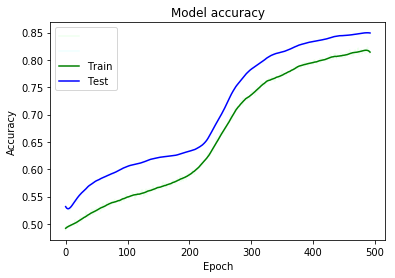

In [259]:
x = list(range(0, 493))
y1 = history_dropout.history['accuracy'] 
y2 = history_dropout.history['val_accuracy'] 
yhat1 = savgol_filter(y1, 51, 5) # window size 51, polynomial order 3
yhat2 = savgol_filter(y2, 51, 5) # window size 51, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['', '', 'Train', 'Test'], loc='best')
plt.show()

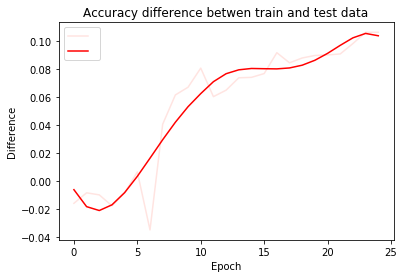

In [213]:
X = hist.history['accuracy']
Y = hist.history['val_accuracy'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 25))
y = x_y
yhat = savgol_filter(y, 21, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

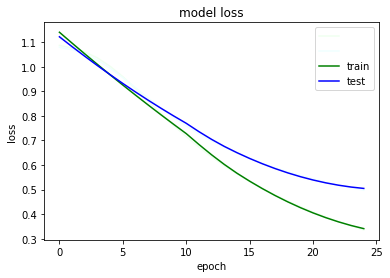

In [214]:
x = list(range(0, 25))
y1 = hist.history['loss'] 
y2 = hist.history['val_loss'] 
yhat1 = savgol_filter(y1, 21, 2) # window size 501, polynomial order 3
yhat2 = savgol_filter(y2, 21, 2) # window size 501, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

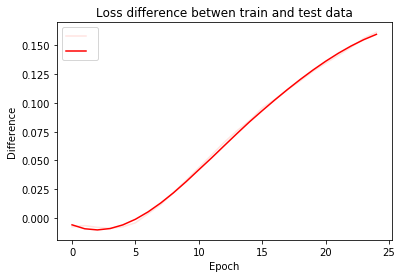

In [217]:
X = hist.history['val_loss']
Y = hist.history['loss'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 25))
y = x_y
yhat = savgol_filter(y, 21, 3) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Loss difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

<ul>
<h3>Predictions</h3>
</ul>

In [218]:
predictions = model.predict(X_trainset)
rounded = [round(x[0]) for x in predictions]

In [219]:
predictions = model.predict(X_trainset)

In [ ]:
for i in range(10):
    print('%d (expected %d)' % (predictions[i], Y[i]))

<ul>
<h3>Plot the ANN</h3>
</ul>

In [170]:
ann_viz(model, title="Auhtor_Prediction")

ValueError: invalid literal for int() with base 10: 'None'

Question 3
- 

Question bonus
- Embedding repreent mots avec des vecteurs, plusoeurs dimensions, vector de valeurs (re faire comme ancien homework). Compare vector to see if word are close or not each other
- Embeding une facon de representer mots into data

Noise into the data


In [319]:
docs_noise = pd.DataFrame(docs)
docs_noise.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,1046,11510,3666,13,2368,1313,31894,20049,1907,5078
1,0,0,0,0,0,0,0,0,0,0,...,4,31895,5359,211,1065,118,771,1086,3119,20050
2,0,0,0,0,0,0,0,0,0,0,...,150,4045,873,3007,1375,13,1793,31897,31898,24547
3,0,0,0,0,0,0,0,0,0,0,...,711,24552,45023,2907,31901,45024,2011,16912,24553,20054
4,0,0,0,0,0,0,0,0,0,0,...,31903,108,966,45026,4604,3121,442,1754,31904,45027


In [320]:
import random

In [321]:
my_list = [0]*9789 + [1]*9790
my_list1 = [0]*9789 + [1]*9790
my_list2 = [0]*9789 + [1]*9790
my_list3 = [0]*9789 + [1]*9790
my_list4 = [0]*9789 + [1]*9790
random.shuffle(my_list)
random.shuffle(my_list1)
random.shuffle(my_list2)
random.shuffle(my_list3)
random.shuffle(my_list4)
my_list[0:10]

[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]

In [322]:
docs_noise[51] = docs_noise[51] + my_list
docs_noise[102] = docs_noise[102] + my_list1
docs_noise[153] = docs_noise[153] + my_list2
docs_noise[204] = docs_noise[204] + my_list3
docs_noise[255] = docs_noise[255] + my_list4

In [341]:
docs_noise = docs_noise.values

In [345]:
docs_noise

array([[    0,     0,     0, ..., 20049,  1907,  5079],
       [    0,     0,     0, ...,  1086,  3119, 20051],
       [    0,     0,     0, ..., 31897, 31898, 24547],
       ...,
       [    0,     0,     0, ...,   697,   152,  9350],
       [    0,     0,     0, ...,  1574, 21725,    95],
       [    0,     0,     0, ...,  4295,   444, 50417]])

In [346]:
docs

array([[    0,     0,     0, ..., 20049,  1907,  5079],
       [    0,     0,     0, ...,  1086,  3119, 20051],
       [    0,     0,     0, ..., 31897, 31898, 24547],
       ...,
       [    0,     0,     0, ...,   697,   152,  9350],
       [    0,     0,     0, ...,  1574, 21725,    95],
       [    0,     0,     0, ...,  4295,   444, 50417]])

In [342]:
input_dim = np.max(docs_noise) + 3
embedding_dims = 25

In [343]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [348]:
epochs = 100
x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [19579, 6]

In [333]:
model = create_model()
hist = model.fit(x_train, y_train,
                 batch_size=1600,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

ValueError: Can't convert non-rectangular Python sequence to Tensor.